1# Machine Learning

## HSE, 2024-25

### Home Assignment #2. Mathematical Optimization


Assignment completed by:

    Akhemenko Mikhail

### General Information

__Publication date:__ 20.04.2025

__Deadline:__ 04:00 30.04.2025

### Grading and Penalties

The number of points for each problem in this homework assignment is indicated next to the problem statement.

The grade for the homework assignment is calculated using the following formula:

$$
s \times 10/34 ,
$$

where $ s $ is the number of points you scored in total for all problems.

A late submission penalty of 1 **secondary** point per day is applied to the final grade for the assignment, but the delay cannot exceed one week.

**Important:** This homework assignment includes several problems for which you can earn bonus points. Bonus points are added to the regular points, and it may turn out that your final grade exceeds 10. In this case, that will be your grade. Therefore, it is **possible** to score more than 10 for this assignment.

__Attention!__ Homework assignments must be completed independently. "Similar" solutions are considered plagiarism, and all involved students (including those from whom the work was copied) will receive no more than 0 points for the assignment.

Additionally, please remember that all solutions are run through a special new anti-plagiarism system for Jupyter notebooks, which detects cross-similarities between different notebooks, as well as solutions generated by neural networks. Such work will also be strictly considered as plagiarism.

### Submission Format

You upload your solution using the link provided in the telegram channel. You need to upload a file with the extension .ipynb (Python notebook)

### About the Assignment

In this assignment, we will practice working with mathematical analysis and optimization methods, a clear understanding of which is absolutely necessary for any task and model in machine learning.

In the first part of the assignment, we will work with the following function:

$$y(x) = x^{3} \ln(x)$$

### Task 1


#### 1.1. (1 point)

Calculate the derivative of this function analytically. To do this, either use a sheet of paper and attach a photo here, or use LaTeX markup language, which is supported in Jupyter notebooks.

$$
y(x)' = (x^{3})' \ln(x) + x^{3} (\ln(x))' = 3 x^{2} \ln(x) + x^{3} \frac{1}{x} = 3 x^{2} \ln(x) + x^{2} = x^{2} (3 \ln(x) + 1)
$$


#### 1.2. (2 points)

Write a program function `f(x)` that would compute the value of our function at a given point and return this value as the answer; and write a program function `df(x)` that would compute the value of the derivative of our function at a given point and return this value as the answer.

Be sure to test all functions at a specific point. Ensure that the answers from your previous section (on paper) and the program in this section match completely.

In [27]:
from functools import lru_cache

import numpy as np


def ln(x: float) -> float:
    return np.log(x).item()


def f(x: float) -> float:
    formula = x ** 3 * ln(x)
    return formula


def df(x: float) -> float:
    formula = x ** 2 * (3 * ln(x) + 1)
    return formula

# x = np.e

# f(x)
# df(x)



#### 1.3. (2 points)

Visualize our function (plot the graph).


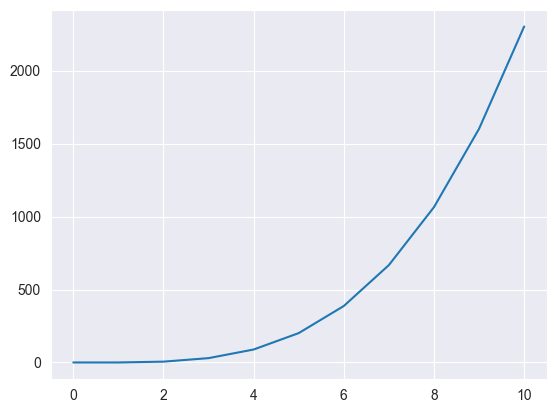

In [28]:
import matplotlib.pyplot as plt

x_list = [0.0001, 0.7, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y_list = list(map(f, x_list))

plt.plot(x_list, y_list)

### Task 2

#### 2.1. (4 points)

Implement the function `get_min_with_gd` that takes the initial point $x_0$, the number of steps, `lr` (learning rate), and `threshold`; performs gradient descent to find the minimum; and returns the sequence of points obtained at each step.

In [29]:
from typing import Callable


def get_min_with_gd(x0: float, grad_func: Callable, lr: float = 1, threshold: float = 0.00001, n_iter: int = 1500) -> np.array:
    w = x0
    vector = [w]

    for _ in range(n_iter):
        w = vector[-1]

        grad = grad_func(w)
        norm = np.linalg.norm(grad)
        w = w - lr * grad / norm

        if w <= 0:  # because of ln(w)
            continue

        if norm < threshold:
            break

        vector.append(w)

        lr = max(lr - 0.001, 0.001)

    return np.array(vector)




#### 2.2. (2 points)

Run the search for the minimum from several arbitrary points (at least 3).

Check that everything works as expected by plotting the graph of the coordinate of the point as a function of the iteration of gradient descent for each run.

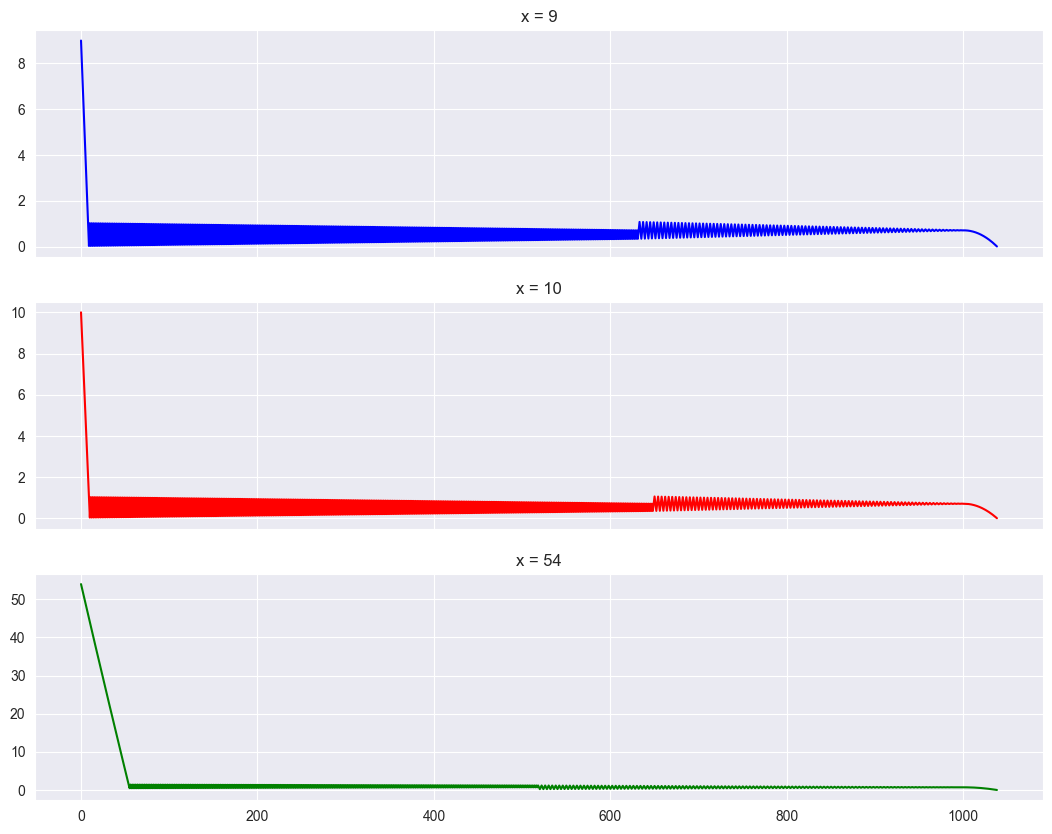

In [30]:
ARBITRARY_X = {
    0: (9, "blue"),
    1: (10, "red"),
    2: (54, "green"),
}

_, ax = plt.subplots(3, 1, figsize=(13, 10), sharex=True)

for ax_num, (x, color) in ARBITRARY_X.items():
    vector = get_min_with_gd(x, df)
    ax[ax_num].plot(vector, color=color)
    ax[ax_num].set_title(f"x = {x}")


#### 2.3. (3 points)

Plot the graph of the function once again. On this graph, plot the movement of the algorithm from the initial points to the final point in different colors. Mark the true minimum on the graph with a separate point and label it (as text on the graph).

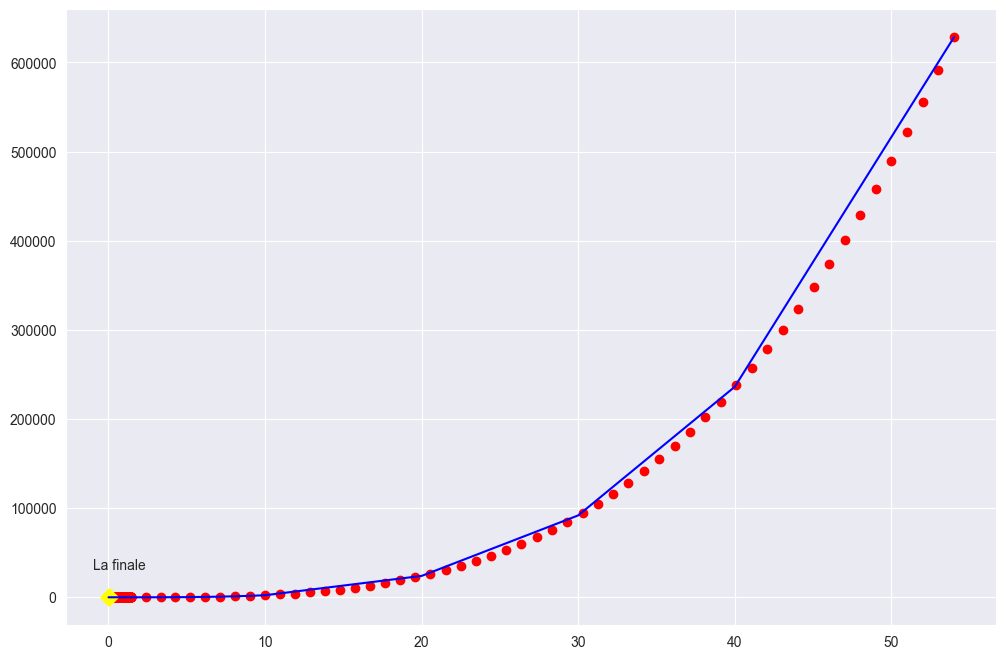

In [31]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
# _, ax = plt.subplots(figsize=(12, 8))


x_list = [0.0001, 0.7, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 54]
y_list = list(map(f, x_list))
plt.plot(x_list, y_list, color="blue")
# ax.plot(x_list, y_list, color="blue")

x = x_list[-1]
x_list_grad = get_min_with_gd(x, df)
# x_list_grad = [i for i in x_list_grad if i > 0]
y_list_grad = list(map(f, x_list_grad))
plt.scatter(x_list_grad, y_list_grad, color="red")
# ax.scatter(x_list_grad, y_list_grad, color="red")


x_list_grad_final = x_list_grad[-1]
y_list_grad_final = y_list_grad[-1]
plt.scatter(x_list_grad_final, y_list_grad_final, color="yellow", marker="x", linewidths=10)
plt.text(x_list_grad_final - 1, y_list_grad_final + y_list_grad[0] / 20, "La finale")
# ax.plot(x_list_grad_final, y_list_grad_final, color="yellow",linewidth=10)
# ax.text(x_list_grad_final, y_list_grad_final, s="Final point", )

plt.show()


### Task 3

Starting from Task 3, we will work with other functions.

Let

$$f = \log((e^x + e^{-2x}) \cdot(e^{y + 1} + 0.5 \cdot e^{-y}))$$


#### 3.1. (1 point and 2 bonus points)

Is it true that $ f $ has a unique point of local minimum, and that this local minimum is also global? Why or why not? Prove your answer!

*Note: In this task, a graphical proof is worth 1 point; a rigorous mathematical proof is worth 2 bonus points.*


Решение.

Для начала, наша функция является непрерывной (логарифм - элементарная фукнция, т.к. обратная к степенной; суммы степенных фукнций в скобках - суммы элементарных ф-ций, и их произведение - произведение элементарных фукнций) и дифференцируемой на всей обрасти определения.
Функцию можно упростить - ещё легче понять, что она дифф-ма.

$$f = \log(e^x + e^{-2x}) + \log(e^{y + 1} + 0.5 \cdot e^{-y})$$

Пусть
$$f1 = \log(e^x + e^{-2x})$$
$$f2 = \log(e^{y + 1} + 0.5 \cdot e^{-y})$$

будем их исследовать отдельно (очень подробно писать не буду, т.к. в латехе замучаюсь).
Хоть по фукнциям и видно, что они обе строго выпуклые на всей области (логарифмы от экспонент), и если они обе имеют локальные минимумы, то это будут и глобальные => изначальная фукнция будет вести себя так же, но можно попробовать доказать через производные.

Посчитаем для f1, первая производная по x:


$$f1'(x) = \frac{d}{dx} \ln(e^x + e^{-2x}) = \frac{e^x - 2e^{-2x}}{e^x + e^{-2x}}$$

Находим критические точки:

$$f1'(x) = 0 \Rightarrow e^x - 2e^{-2x} = 0$$
$$e^x = 2e^{-2x}$$
$$e^{3x} = 2$$
$$x = \frac{1}{3} \ln 2$$


Вторая производная

Обозначим:

$$u(x) = e^x + e^{-2x}, \quad u'(x) = e^x - 2e^{-2x}, \quad u''(x) = e^x + 4e^{-2x}$$
Тогда:

$$f1''(x) = \frac{u''(x) \cdot u(x) - (u'(x))^2}{(u(x))^2}$$


$$f1''(x) = \frac{(e^x + 4e^{-2x})(e^x + e^{-2x}) - (e^x - 2e^{-2x})^2}{(e^x + e^{-2x})^2}$$


Так как знаменатель положителен, а числитель в точке $$x = \frac{1}{3} \ln 2$$ тоже положителен, то:

$$f_1''(x) > 0$$


Следовательно, в этой точке функция имеет локальный минимум.
Поскольку f1(x) является выпуклой функцией на всей области определения, этот минимум является также глобальным минимумом.



Локальный минимум достигается при условии, что первая производная равна 0 и вторая производная больше нуля.


Первая производная по y:
$$f1'(y) = \frac{d}{dy} \ln(e^{y+1} + 0.5e^{-y}) = \frac{e^{y+1} - 0.5e^{-y}}{e^{y+1} + 0.5e^{-y}}$$



Критическая точка:

$$f1'(y) = 0 \Rightarrow e^{y+1} = 0.5e^{-y}$$
$$\Rightarrow e^{2y+1} = 0.5 \Rightarrow 2y + 1 = \ln(0.5)$$
$$\Rightarrow y = \frac{\ln(0.5) - 1}{2}$$


Вторая производная:

(обозначим)
$$u(y) = e^{y+1} + 0.5e^{-y}, \quad u'(y) = e^{y+1} - 0.5e^{-y}, \quad u''(y) = e^{y+1} + 0.5e^{-y}$$
тогда
$$f1''(y) = \frac{u''(y) \cdot u(y) - (u'(y))^2}{(u(y))^2}$$
подставим
$$f1''(y) = \frac{(e^{y+1} + 0.5e^{-y})^2 - (e^{y+1} - 0.5e^{-y})^2}{(e^{y+1} + 0.5e^{-y})^2}$$
Числитель — это разность квадратов:
$$(a + b)^2 - (a - b)^2 = 4ab, \quad a = e^{y+1}, \quad b = 0.5e^{-y}$$
Получаем
$$f1''(y) = \frac{4 \cdot e^{y+1} \cdot 0.5e^{-y}}{(e^{y+1} + 0.5e^{-y})^2} = \frac{2e}{(e^{y+1} + 0.5e^{-y})^2}$$


$$f1''(y) > 0 \text{ при всех } y \in \mathbb{R}$$

Значит, функция выпуклая на всей области, и найденная критическая точка — это глобальный минимум.




In [ ]:
#No code - see a lot of formulas and text above

#### 3.2. (3 points and 2 bonus points)

Come up with some functions $ g $ and $ h $ of two variables such that
- the function $ g $ has no global minimum (not bounded below);
- the function $ h $ has at least two local minima that are not equal to each other.

Prove that your functions satisfy the stated criteria.

*Note: In this task, a graphical proof is evaluated within the main points; a rigorous mathematical proof is worth 2 bonus points.*


Фукнции, которые очевидно подходят под условия:

$$g = ln(x)$$
Логарифм не определён в нуле - в пределе слева фукнция бесконечна. Первая производная = 1/x, и она никогда не равна нулю => нет точек перегиба => нет локальным минимумов

$$h = (x^{2} - 1)^{2}$$
Эта вообще имеет два глобальным минимума в -1 и +1 (типа параболы со раздвоенным основанием). Если брать первую производную, что её корни будут -1, 0, 1 (-1 и 1 - локальные минимумы, 0 - локальный максимум - тут значение функции равно 1). Сама первая производная = $$2(x{^2}-1)2x$$
Вторая производная = $$12x{^2} - 4$$

В точках экстремумов (-1, 0, 1) вторая производная > 0 в двух точках: -1 и 1, в обеих точка она принимает одно и то же значение фукнции => обе точки являются локальными минимумами, но ни одна из не является глобальным минимумом


In [ ]:
#No code - see a lot of formulas and text above

#### 3.3. (5 points)

Implement the function `get_min_with_rmsprop` that takes the initial point $ x_0 $, the number of steps, `lr`, `beta`, and `threshold`; performs gradient descent with RMSProp modification to find the minimum; and returns the sequence of points obtained at each step.

Here are the formulas for this algorithm:

$$ g^{n+1} = ∇f(w^{n}) $$
$$ \gamma^{n+1} = (1 - \beta) \gamma^{n} + \beta (g^{n+1})^2 $$
$$ w^{n+1} = w^n - \frac{\alpha}{\sqrt{\gamma^{n+1} + \epsilon}}⋅g^{n+1} $$

Here, $ α $ is the learning rate, $ \epsilon $ is a small number (0.0001 can be used to avoid division by zero), and $ beta $ is the momentum term(measure of inertia).



In [153]:
def get_min_with_rmsprop(
    x: np.array,
    beta: float,
    grad_func: Callable,
    lr: float = 1,
    threshold: float = 0.00001,
    n_iter: int = 150,
) -> np.array:

    epsilon = 0.0001
    gamma = 0
    vector = [x]

    for i in range(n_iter):
        w = vector[-1]

        grad = grad_func(w)
        gamma = (1 - beta) * gamma + beta * (grad ** 2)

        error_fu = lr * grad / np.sqrt(gamma + epsilon)
        w = w - error_fu

        norm = np.linalg.norm(error_fu) if isinstance(x, list) else error_fu

        if norm < threshold:
            break

        vector.append(w)

        lr = max(lr - 0.001, 0.001)

    return np.array(vector)

    # Your code here

#### 3.4. (4 points)

Run the search for the minimum for all three functions ($f$, $g$, $h$) from several arbitrary points (at least 3, resulting in at least 9 runs).

Check that everything works as expected by plotting the graph of the coordinates of the point (2D graph) as it progresses through gradient descent for each run. All graphs should be plotted on three pairs of axes, arranged vertically on one canvas (separate axes for each function; different runs for one function should be displayed on the same axes).

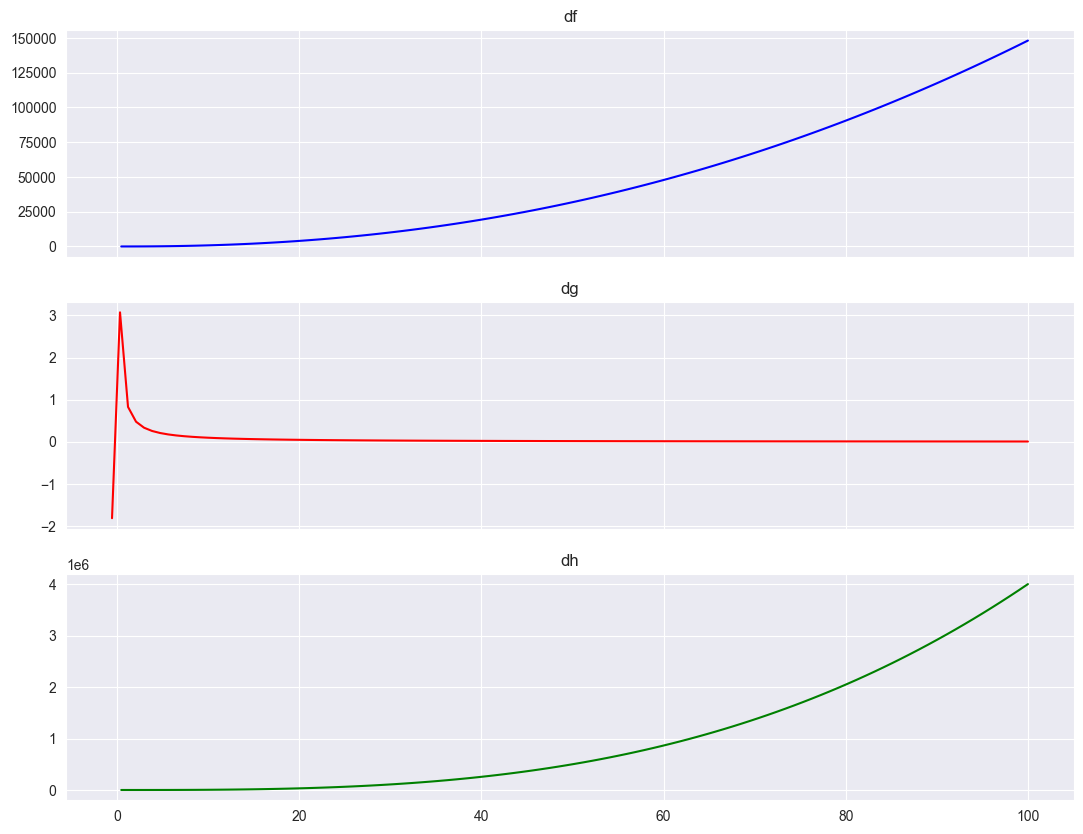

In [154]:
from typing import Callable


def g(x: float) -> float:
    formula = ln(x)
    return formula

def h(x: float) -> float:
    formula = (x ** 2 - 1) ** 2
    return formula


# def get_approximate_derivative_value_in_point(func: Callable, x: float, h: float = 0.00001) -> float:
#     return (
#         func(x + h)
#         -
#         func(x - h)
#     ) / (2 * h)


def dg(x: float) -> float:
    formula = 1 / x
    return formula

def dh(x: float) -> float:
    formula = 2 * (x ** 2 - 1) * 2 * x
    return formula



# a = get_min_with_rmsprop(x=100, beta=1, grad_func=dh)
# print(a)

ARBITRARY_X = {
    0: (100, "blue", df),
    1: (100, "red", dg),
    2: (100, "green", dh),
}

_, ax = plt.subplots(3, 1, figsize=(13, 10), sharex=True)

for ax_num, (x, color, grad_func) in ARBITRARY_X.items():
    x_list_grad = get_min_with_rmsprop(x=x, beta=1, grad_func=grad_func)
    y_list_grad = list(map(grad_func, x_list_grad))
    ax[ax_num].plot(x_list_grad, y_list_grad, color=color)
    # ax[ax_num].scatter(x_list_grad, y_list_grad, color=color)
    ax[ax_num].set_title(f"{grad_func.__name__}")


#### 3.5. (3 points)

Plot the graphs of the functions again. On these graphs, plot the movement of the algorithm from the initial points to the final point in different colors. Where the functions have them, mark the true local minima on the graphs as separate points, and label them with text on the graph. All graphs should be plotted on three sets of axes, arranged vertically on one canvas—separate axes for each function.

0.7165417198431205 -0.12262648027402172
3.088953927172227e-05 -10.385092966272168
1.000058927144486 1.3890451917573645e-08


C:\Users\guppi\AppData\Local\Temp\ipykernel_8404\132449806.py:6: RuntimeWarning: invalid value encountered in log
  return np.log(x).item()


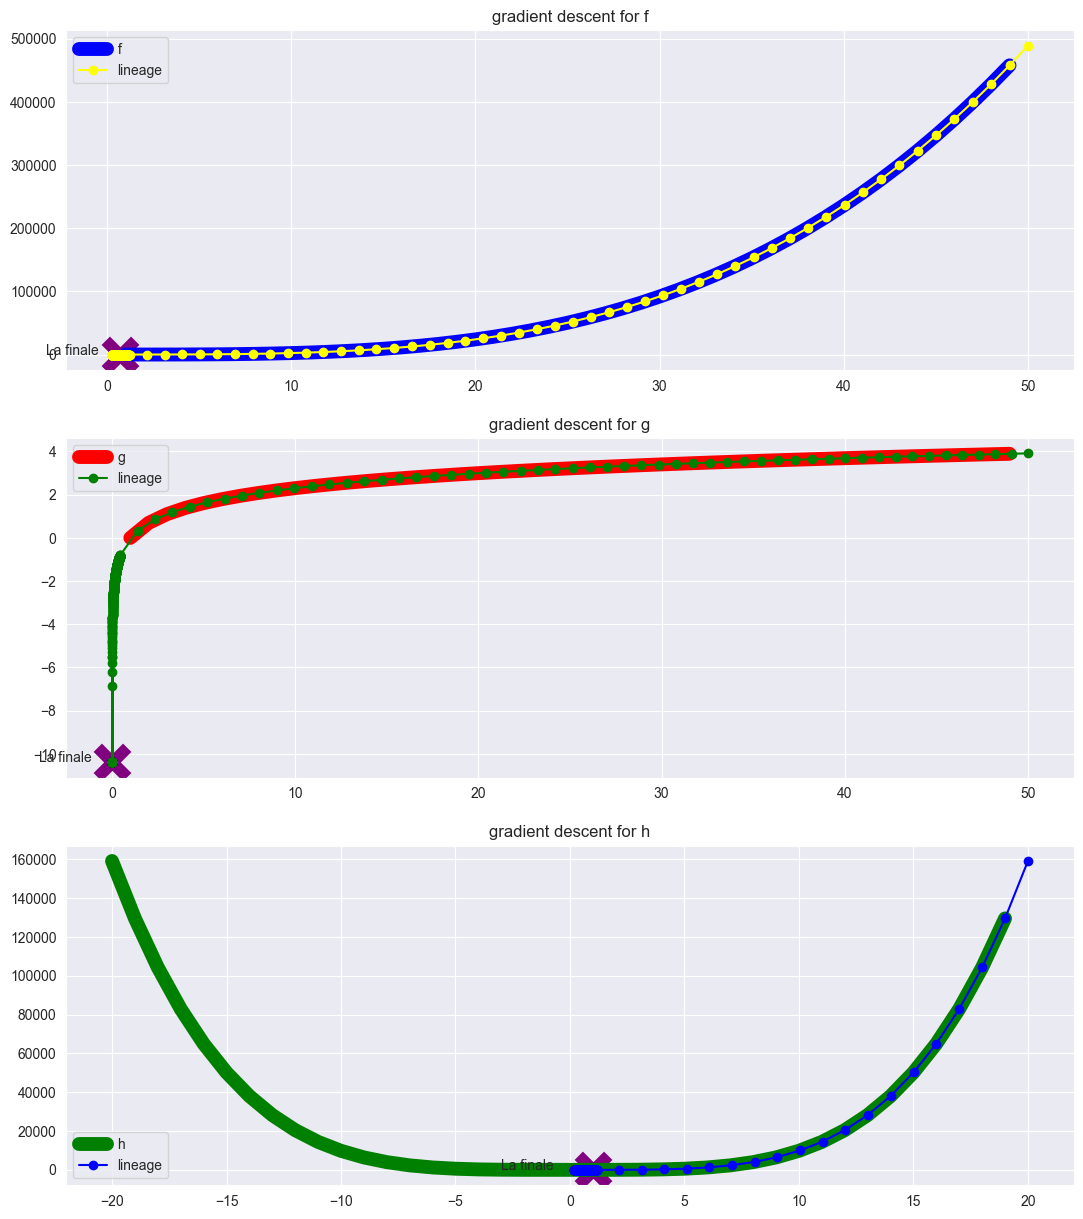

In [166]:
ARBITRARY_X = {
    0: (1, 50, "blue", df, f, "yellow"),
    1: (1, 50, "red", dg, g, "green"),
    2: (-20, 20, "green", dh, h, "blue"),
}


_, ax = plt.subplots(3, 1, figsize=(13, 15), sharex=False)

for ax_num, (x_from, x_to, color, grad_func, func, color_path) in ARBITRARY_X.items():

    x_coord = list(range(x_from, x_to, 1))
    y_coord = list(map(func, x_coord))

    ax[ax_num].plot(x_coord, y_coord, label=f"{func.__name__}", color=color, linewidth=10)

    x_list_grad = get_min_with_rmsprop(x=x_to, beta=1, grad_func=grad_func)
    y_list_grad = list(map(func, x_list_grad))

    ax[ax_num].plot(x_list_grad, y_list_grad, color=color_path, label="lineage", marker='o')


    ax[ax_num].legend()
    ax[ax_num].set_title(f"gradient descent for {func.__name__}")


    x_list_grad_final = x_list_grad[-1]
    y_list_grad_final = y_list_grad[-1]
    print(x_list_grad_final, y_list_grad_final)
    ax[ax_num].scatter(x_list_grad_final, y_list_grad_final, color="purple", marker="x", linewidths=30)
    ax[ax_num].text(x_list_grad_final - 4, y_list_grad_final, "La finale")




### Task 4

#### Scaling to Multidimensional Case (4 points)

Ensure that your `get_min_with_rmsprop` function from the previous task works not only with functions of two variables but also with functions of an arbitrary number of variables. Make any necessary adjustments to the function below.

Devise any function of 5 variables that has some minimum (for example, the simplest point $(0, 0, 0, 0, 0)$) and run gradient descent with RMSProp for this function. Verify that the gradient descent indeed converges to the correct extremum point.

In [167]:
def f_5d(x: np.array) -> float:
    return (
        x[0] ** 2
        + 2 * (x[1] ** 2)
        + 4 * (x[2] ** 2)
        + 8 * (x[3] ** 2)
        + 16 * (x[4] ** 2)
    )

def df_5d(x: np.array) -> np.array:
    return np.array([
        2 * x[0],
        4 * x[1],
        8 * x[2],
        16 * x[3],
        32 * x[4],
    ])


x_arr = [1, 2, 3, 4, 5]

x_list_grad = get_min_with_rmsprop(x=x_arr, beta=1, grad_func=df_5d)
# print(x_list_grad)

print(x_list_grad[-1])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()